In [65]:
import sklearn as sk
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import california_housing, load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, precision_recall_fscore_support
from pylab import plot, plt

In [51]:
lr = LogisticRegression()

In [11]:
X= california_housing.fetch_california_housing()
X

downloading Cal. housing from http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz to /Users/ekremguzelyel/scikit_learn_data


{'DESCR': 'California housing dataset.\n\nThe original database is available from StatLib\n\n    http://lib.stat.cmu.edu/\n\nThe data contains 20,640 observations on 9 variables.\n\nThis dataset contains the average house value as target variable\nand the following input variables (features): average income,\nhousing average age, average rooms, average bedrooms, population,\naverage occupation, latitude, and longitude in that order.\n\nReferences\n----------\n\nPace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,\nStatistics and Probability Letters, 33 (1997) 291-297.\n\n',
 'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5

In [19]:
type(X.data)
X.data[1], X.target[1]

(array([ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,  9.71880492e-01,
         2.40100000e+03,  2.10984183e+00,  3.78600000e+01, -1.22220000e+02]),
 3.585)

In [23]:
x_train,x_test, y_train, y_test = train_test_split(X.data, X.target, test_size=1/3)

In [25]:
len(x_train), len(y_train), len(x_test), len(y_test) 

(13760, 13760, 6880, 6880)

In [29]:
lr.fit_transform(x_train, y_train)

ValueError: Unknown label type: 'continuous'

In [32]:
X, y = load_boston(return_X_y=True)

In [36]:
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size=1/3)

In [47]:
len(x_train), len(y_train), x_train.round(), x_train
x_train = x_train.round()
y_train = y_train.round()

In [52]:
lr.fit_transform(x_train, y_train)

/Users/ekremguzelyel/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/ekremguzelyel/anaconda/lib/python3.6/site-packages/sklearn/utils/__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


array([[ 0.,  0.,  0., ...,  5., 18., 10.],
       [ 0.,  0.,  0., ...,  6., 19.,  5.],
       [ 1.,  0.,  1., ...,  2., 15.,  7.],
       ...,
       [ 0.,  0.,  1., ...,  2., 21., 13.],
       [ 9.,  0.,  1., ...,  2., 20., 17.],
       [ 0.,  0.,  0., ...,  6., 17., 11.]])

In [60]:
preds = lr.predict(x_test)
real_rounded = y_test.round()
preds, real_rounded

(array([11., 36., 20., 19., 21., 39., 24., 15., 20., 22., 20., 18., 21.,
        23.,  7., 25., 22., 24., 14., 14., 21., 15., 18., 14., 14., 14.,
        35., 50., 20., 20., 27., 35., 42., 22., 20., 21., 20., 14., 35.,
        18., 50., 28., 20., 18., 13., 33., 14., 29., 20., 22., 21., 35.,
        21., 11., 14., 21., 21.,  7., 27., 22., 30., 23., 50.,  8., 15.,
        20., 14.,  7., 14., 23., 33., 20., 39., 23., 29., 22., 13., 50.,
        21., 19., 35., 35., 12., 20., 14., 19., 21., 20., 49., 21., 33.,
        35., 20., 20., 20., 14., 36., 20., 20., 23., 36., 24., 28., 21.,
        35., 10., 19., 12., 20., 23., 10., 21., 14., 21., 21., 22., 19.,
        16., 35., 14., 24., 33., 20., 50., 50., 13., 50., 46., 19., 20.,
        22., 19., 14., 21., 39., 15., 35., 23., 19., 13.,  7., 19., 21.,
        46.,  7., 20., 22., 21., 20., 33., 21., 21., 24., 14., 14., 19.,
        11., 14., 21., 18., 21., 23., 18., 35., 18., 21., 24., 18., 39.]),
 array([13., 30., 15., 22., 22., 32., 23., 13., 2

In [61]:
mean_squared_error(preds,y_test)

36.75834319526627

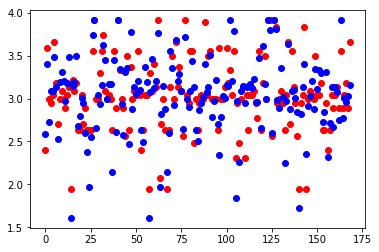

In [84]:
plot(np.log(preds),'ro', np.log(y_test),'bo')
# plot(np.log(y_test),'ro','g')
plt.show()

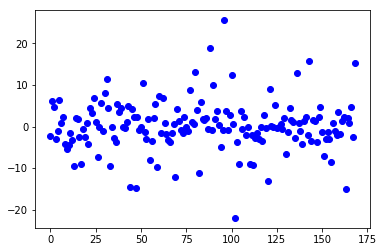

In [86]:
plot(preds - y_test,'bo')
plot()
plt.show()